<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Networked data analyis and visualization
</p>


# Importing required modules

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Basic data types in NetworkX
NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops

**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges

**MultiDiGraph** - Directed Graph with self loops and multiple edges

# Getting started
Create an empty, undirected network

In [2]:
G = nx.Graph()

In [3]:
G

# Nodes
Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it.

Nodes can be added one at a time:

In [4]:
G.add_node(0)
G.add_node("John")

# tuple object representing, say, longitude and latitude
pos = (1.2, 3.4) 
G.add_node(pos)

...or many at once from a python container

In [5]:
# [1,2,3] is a list containing 1, 2, and 3
G.add_nodes_from([1, 2, 3])

In [6]:
G.nodes

NodeView((0, 'John', (1.2, 3.4), 1, 2, 3))

# Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary

Adding attributes at the time of node creation using keyword arguments:

In [7]:
G.add_node("Michael", eye_color='brown', height=180)

In [8]:
G.nodes["Michael"]

{'eye_color': 'brown', 'height': 180}

You can also add attributes to an already existing node

In [9]:
G.add_node("Natalie")

# add an attribute "books" with value 500 to Natalie
G.nodes["Natalie"]["books"] = 500

G.node[n] gives a dictionary containing all the attribute:value pairs associated with node n

In [10]:
print("Michael's eyes are ", G.nodes["Michael"]["eye_color"], " and he is ", G.nodes['Michael']['height'], " cm tall.")
print("Natalie has ", G.nodes["Natalie"]["books"], " books.")

Michael's eyes are  brown  and he is  180  cm tall.
Natalie has  500  books.


# Edges

An edge between node1 and node2 is represented by a tuple (node1, node2)  
They can be added one at a time:

In [11]:
# add edge between node 0 and node 1
G.add_edge(0, 1)

Or many at once from a container

In [12]:
edge_list = [ (2, 1), ("Michael", "Natalie"), (3, 4) ]
G.add_edges_from(edge_list)
print(list(G.nodes))
print(list(G.edges))

[0, 'John', (1.2, 3.4), 1, 2, 3, 'Michael', 'Natalie', 4]
[(0, 1), (1, 2), (3, 4), ('Michael', 'Natalie')]


**Note:** Nodes will be automatically created if they don't already exist.

# Edge attributes
Like nodes, edges can also have arbitrary attributes. An important and special one (for many algorithms) is "weight"  

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [13]:
G.add_edge("Michael", "Natalie", weight=10, s=15)
G["Michael"]["Natalie"]

{'weight': 10, 's': 15}

`G[node1][node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

In [14]:
G.add_edge("Copenhagen", "Aarhus")
attrs = {("Copenhagen", "Aarhus"): {'distance': 186.7}}
nx.set_edge_attributes(G, attrs)

print(list(G.edges))
print(G["Copenhagen"]["Aarhus"]['distance'])
print(G.get_edge_data("Copenhagen", "Aarhus"))

[(0, 1), (1, 2), (3, 4), ('Michael', 'Natalie'), ('Copenhagen', 'Aarhus')]
186.7
{'distance': 186.7}


In [16]:
nx.centrality.betweenness_centrality(G)

{0: 0.0,
 'John': 0.0,
 (1.2, 3.4): 0.0,
 1: 0.022222222222222223,
 2: 0.0,
 3: 0.0,
 'Michael': 0.0,
 'Natalie': 0.0,
 4: 0.0,
 'Copenhagen': 0.0,
 'Aarhus': 0.0}

# Basic operations

### Size of the network

In [17]:
# number of nodes
print(G.number_of_nodes())

# another way
print(len(G))

# number of edges
print(G.number_of_edges())

# another way
print(G.size())

print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

11
11
5
5
G has 11 nodes and 5 edges.


### Testing to see whether nodes or edges exist

In [18]:
G.has_node("Michael")

True

Another way:

In [19]:
"Natalie" in G

True

For edges, you must use `has_edge()` (no syntax like `edge in G`)

In [20]:
print(G.has_edge(3, 4))
print(G.has_edge("Michael", 0))

True
False


### Finding neighbors of a node

In [21]:
for node in G.neighbors(1):
    print(node)

0
2


In [22]:
list(G.neighbors(1))

[0, 2]

### Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

In [23]:
for node, data in list(G.nodes(data=True)): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))

Node 0			: {}
Node John			: {}
Node (1.2, 3.4)			: {}
Node 1			: {}
Node 2			: {}
Node 3			: {}
Node Michael			: {'eye_color': 'brown', 'height': 180}
Node Natalie			: {'books': 500}
Node 4			: {}
Node Copenhagen			: {}
Node Aarhus			: {}


In [24]:
for n1, n2, data in list(G.edges(data=True)):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

0 <----> 1: {}
1 <----> 2: {}
3 <----> 4: {}
Michael <----> Natalie: {'weight': 10, 's': 15}
Copenhagen <----> Aarhus: {'distance': 186.7}


### Calculating degrees

In [25]:
# one node
print(G.degree("Michael")) # returns an integer

# all nodes (returns a dictionary with node : degree pairs for all nodes)
print(G.degree())

# just the degree sequence
degree_sequence = [d for _, d in G.degree()]
print(degree_sequence)

1
[(0, 1), ('John', 0), ((1.2, 3.4), 0), (1, 2), (2, 1), (3, 1), ('Michael', 1), ('Natalie', 1), (4, 1), ('Copenhagen', 1), ('Aarhus', 1)]
[1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1]


As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) # same as G.degree()`


# Other operations

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

In [26]:
mat = nx.adjacency_matrix(G)
mat.toarray()

C:\Windows\Temp\ipykernel_39404\2731642759.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  mat = nx.adjacency_matrix(G)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Getting started: reading in an edge list

Read in the file `test.txt` with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [27]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('files/test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [28]:
N = len(G)
L = G.size()
degrees = [d for _, d in G.degree()]
kmin = min(degrees)
kmax = max(degrees)

In [29]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

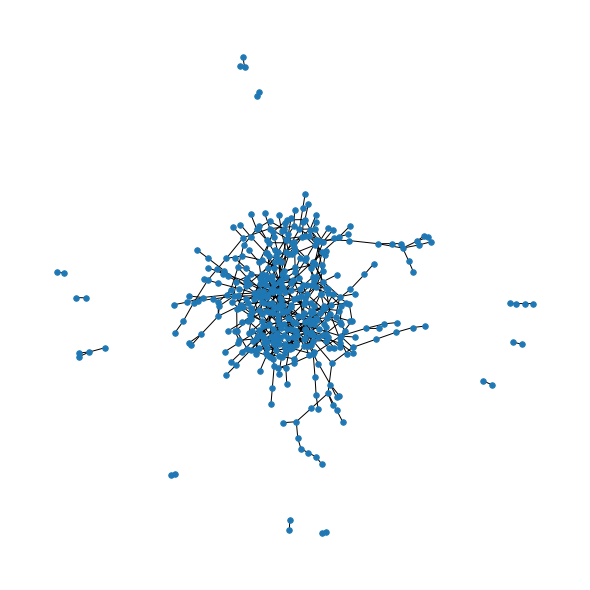

In [32]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=30, )

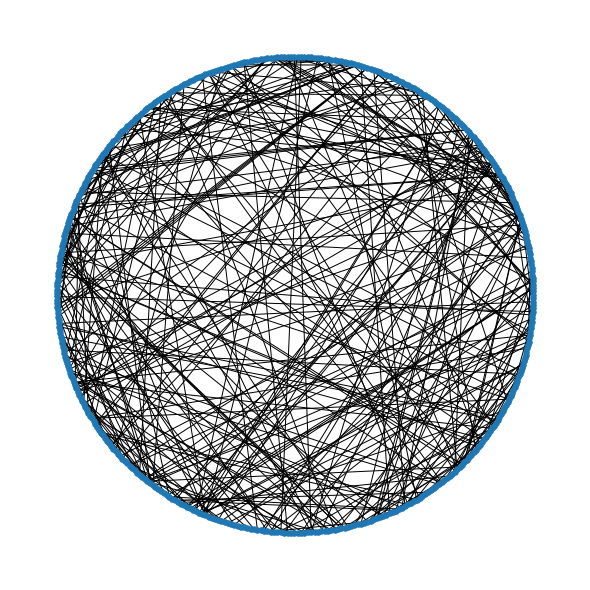

In [33]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=30)

# Plotting the degree distribution

Let's plot it in log scale first with log-binning, using `np.logspace` and `np.histogram`:

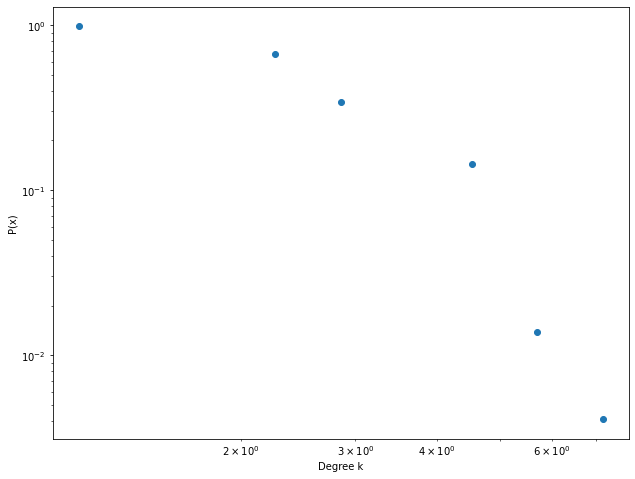

In [34]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_axes([0, 0, 1, 1])

logbins = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
h, binedges = np.histogram(degrees,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2

axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(x)")
axes.set_xscale('log') 
axes.set_yscale('log') 

In [35]:
degrees

[5,
 2,
 5,
 5,
 4,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 5,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 5,
 8,
 3,
 6,
 7,
 6,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 4,
 3,
 2,
 4,
 5,
 1,
 3,
 2,
 7,
 6,
 3,
 1,
 2,
 5,
 3,
 3,
 1,
 1,
 5,
 3,
 5,
 4,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 4,
 1,
 2,
 5,
 1,
 4,
 2,
 3,
 3,
 3,
 1,
 4,
 1,
 1,
 3,
 3,
 4,
 3,
 1,
 1,
 2,
 2,
 1,
 4,
 1,
 5,
 2,
 6,
 3,
 2,
 6,
 3,
 1,
 1,
 5,
 4,
 4,
 4,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 5,
 2,
 3,
 5,
 3,
 1,
 3,
 6,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 2,
 4,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 5,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 4,
 1,
 4,
 2,
 2,
 3,
 2,
 5,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 1,
 2,
 7,
 3,
 2,
 4,
 2,
 1,
 4,
 5,
 3,
 4,
 3,
 1,
 1,
 1,
 4,
 2,
 2,
 3,
 3,
 3,
 4,
 2,
 4,
 5,
 1,
 3,
 4,
 3,
 4,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 3,
 2,
 3,
 4,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 4,
 2,
 3,
 5,
 2,
 1,
 2,
 4,
 4,


This is clearly not a network with anything like a heavy-tailed degree distribution.
So let's plot it in linear scale without any binning:

Counter({2: 153, 1: 113, 3: 99, 4: 43, 5: 23, 6: 8, 7: 3, 8: 1})
dict_items([(5, 0.05191873589164785), (2, 0.345372460496614), (4, 0.09706546275395034), (3, 0.2234762979683973), (1, 0.255079006772009), (8, 0.002257336343115124), (6, 0.01805869074492099), (7, 0.006772009029345372)])


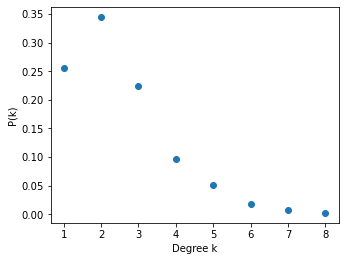

In [38]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# See: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
from collections import Counter
degree_sequence = [d for _, d in G.degree()]  # degree sequence
degreeCount = Counter(degree_sequence)
print(degreeCount) # print for teaching

# Normalize
total = sum(degreeCount.values())
for key in degreeCount:
    degreeCount[key] /= total
print(degreeCount.items()) # print for teaching
    
deg, prob = zip(*degreeCount.items()) # unpacks the first tuple elements into deg, unpacks the second tuple elements into prob


axes.plot(deg, prob, "o")
axes.set_xlabel("Degree k")
axes.set_ylabel("P(k)");

# node importance

`nx.centrality.betweenness_centrality()`

`nx.centrality.degree_centrality()`

`nx.centrality.closeness_centrality()`

`nx.pagerank()`

In [37]:
nx.pagerank(G)

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

# Network visualization with Netwulf

It's a very new package (right now version v0.1.5) developed by Ben Maier and Ulf Aslak, so use with caution: https://pypi.org/project/netwulf/

That being said, many people are already using it because of its easy controls and Jupyter notebook integration.
Install: `pip install netwulf`

In [28]:
#!pip install netwulf

In [39]:
import netwulf as wulf

G = nx.barabasi_albert_graph(100,m=1)
stylized_network, config = wulf.visualize(G)

ModuleNotFoundError: No module named 'netwulf'

# The End

**Source**

This notebook was adapted from:
* A network science class by Sean Cornelius and Emma Thompson
* Introduction to Data Science and Visualization by James Bagrow
* Introduction to Data Science by Michael Szell